In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
rmse_tab = pd.read_csv('/home-local/Kernel_Conversion/Experiment/Outputs_2/train_output/run_0/assessment_single_checkpoint/checkpoint_80/metric_mse.csv')

In [3]:
rmse_tab.head()

,pid,raw,convert
0,128882,3642.185042,186.527729
1,118235,3622.720163,70.193717
2,207023,4023.305784,195.012736
3,121296,2633.296365,74.047478
4,120870,3074.159187,187.272998


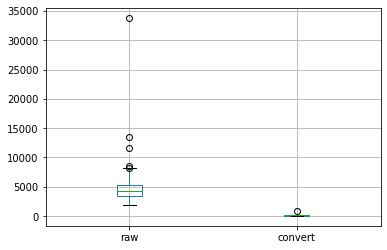

In [4]:
rmse_tab.boxplot(column = ['raw', 'convert'])

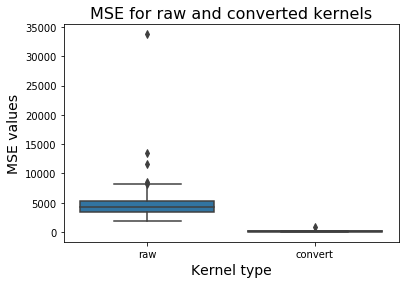

In [5]:
#Boxplot for MSE metric
df = pd.DataFrame(data = rmse_tab, columns = ["raw", "convert"])
bplot = sns.boxplot(x="variable", y="value", data = pd.melt(df), order = ["raw","convert"])
bplot.axes.set_title("MSE for raw and converted kernels", fontsize = 16)
bplot.set_xlabel("Kernel type", fontsize =14)
bplot.set_ylabel("MSE values", fontsize = 14)
plt.show()

In [6]:
T0 = pd.read_csv('/nfs2/NLST/NIfTI/T0_all.csv')

In [7]:
T0

,pid,manufacture,model_name,convolution_kernel,slice_thickness,nii_file,png_file,voxel_size_x,voxel_size_y,voxel_size_z,num_img_dimension,num_dcm,orient,series_uid,record_retrieval_failed,time_point
0,130694,GE MEDICAL SYSTEMS,LightSpeed QX/i,EXPERIMENTAL7,358.727264,1,1,0.596847,0.545455,265.000000,3.0,2,ASL,1.2.840.113654.2.55.20894722146381782923403247...,NaN,T0
1,130694,GE MEDICAL SYSTEMS,LightSpeed QX/i,STANDARD,2.500000,1,1,0.644531,0.644531,2.000000,3.0,150,LAS,1.2.840.113654.2.55.12730625245910917329262333...,NaN,T0
2,134532,GE MEDICAL SYSTEMS,HiSpeed QX/i,EXPERIMENTAL7,460.181793,1,1,0.596847,0.545455,265.000000,3.0,2,ASL,1.2.840.113654.2.55.19775853905673308355525811...,NaN,T0
3,134532,GE MEDICAL SYSTEMS,HiSpeed QX/i,BONE,2.500000,1,1,0.703125,0.703125,2.500000,3.0,137,LAS,1.2.840.113654.2.55.60126924226029595678182467...,NaN,T0
4,134532,GE MEDICAL SYSTEMS,HiSpeed QX/i,STANDARD,2.500000,1,1,0.703125,0.703125,2.500000,3.0,137,LAS,1.2.840.113654.2.55.17876359784670337597334889...,NaN,T0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69901,205219,TOSHIBA,Aquilion,FL01,2.000000,0,0,NaN,NaN,NaN,NaN,1,NaN,1.3.6.1.4.1.14519.5.2.1.7009.9004.270279400844...,NaN,T0
69902,205219,TOSHIBA,Aquilion,FC51,2.000000,1,1,0.743000,0.743000,1.699951,3.0,194,LAS,1.3.6.1.4.1.14519.5.2.1.7009.9004.150045947460...,NaN,T0
69903,131515,GE MEDICAL SYSTEMS,HiSpeed QX/i,STANDARD,2.500000,1,1,0.664062,0.664062,2.500000,3.0,138,LAS,1.2.840.113654.2.55.34818673837865089145662278...,NaN,T0
69904,131515,GE MEDICAL SYSTEMS,HiSpeed QX/i,BONE,2.500000,1,1,0.664062,0.664062,2.500000,3.0,138,LAS,1.2.840.113654.2.55.18333105177928074785593996...,NaN,T0


In [8]:
man = T0['manufacture']
con_ker = T0['convolution_kernel']

In [9]:
con_ker.unique()

array(['EXPERIMENTAL7', 'STANDARD', 'BONE', 'B30f', 'T20s', 'B50f', 'C',
       nan, 'D', 'FC10', 'FL01', 'FC11', 'FC51', 'B80f', 'LUNG', 'FC82',
       'A', 'B', 'B20f', 'B60f', 'B70f', 'FC02', 'FC01', 'B31f', 'FC53',
       'B35f', 'FC50', 'B31s', 'B30s', 'FC52', 'B40f', 'EC'], dtype=object)

In [10]:
new = pd.DataFrame({'Manufacturer':man, 'Convolution_kernel':con_ker})

In [11]:
new

,Manufacturer,Convolution_kernel
0,GE MEDICAL SYSTEMS,EXPERIMENTAL7
1,GE MEDICAL SYSTEMS,STANDARD
2,GE MEDICAL SYSTEMS,EXPERIMENTAL7
3,GE MEDICAL SYSTEMS,BONE
4,GE MEDICAL SYSTEMS,STANDARD
...,...,...
69901,TOSHIBA,FL01
69902,TOSHIBA,FC51
69903,GE MEDICAL SYSTEMS,STANDARD
69904,GE MEDICAL SYSTEMS,BONE


In [12]:
all_vals = new[new['Convolution_kernel'].notna()]

In [13]:
all_vals

,Manufacturer,Convolution_kernel
0,GE MEDICAL SYSTEMS,EXPERIMENTAL7
1,GE MEDICAL SYSTEMS,STANDARD
2,GE MEDICAL SYSTEMS,EXPERIMENTAL7
3,GE MEDICAL SYSTEMS,BONE
4,GE MEDICAL SYSTEMS,STANDARD
...,...,...
69901,TOSHIBA,FL01
69902,TOSHIBA,FC51
69903,GE MEDICAL SYSTEMS,STANDARD
69904,GE MEDICAL SYSTEMS,BONE


In [14]:
all_vals['Convolution_kernel'].unique()

array(['EXPERIMENTAL7', 'STANDARD', 'BONE', 'B30f', 'T20s', 'B50f', 'C',
       'D', 'FC10', 'FL01', 'FC11', 'FC51', 'B80f', 'LUNG', 'FC82', 'A',
       'B', 'B20f', 'B60f', 'B70f', 'FC02', 'FC01', 'B31f', 'FC53',
       'B35f', 'FC50', 'B31s', 'B30s', 'FC52', 'B40f', 'EC'], dtype=object)

In [15]:
all_vals['Manufacturer'].unique()

array(['GE MEDICAL SYSTEMS', 'SIEMENS', 'Philips', 'TOSHIBA'],
      dtype=object)

In [44]:
all_vals

,Manufacturer,Convolution_kernel
0,GE MEDICAL SYSTEMS,EXPERIMENTAL7
1,GE MEDICAL SYSTEMS,STANDARD
2,GE MEDICAL SYSTEMS,EXPERIMENTAL7
3,GE MEDICAL SYSTEMS,BONE
4,GE MEDICAL SYSTEMS,STANDARD
...,...,...
69901,TOSHIBA,FL01
69902,TOSHIBA,FC51
69903,GE MEDICAL SYSTEMS,STANDARD
69904,GE MEDICAL SYSTEMS,BONE


In [66]:
a = all_vals.value_counts(dropna=False)
a = a.to_frame().reset_index()
a = a.rename(columns={0:'Counts'})
a

,Manufacturer,Convolution_kernel,Counts
0,GE MEDICAL SYSTEMS,STANDARD,14642
1,GE MEDICAL SYSTEMS,EXPERIMENTAL7,10727
2,SIEMENS,B30f,10241
3,SIEMENS,B50f,8822
4,SIEMENS,T20s,7095
5,GE MEDICAL SYSTEMS,BONE,6885
6,Philips,C,2106
7,TOSHIBA,FC51,1574
8,TOSHIBA,FL01,1550
9,Philips,D,1406


In [38]:
kernels = all_vals['Convolution_kernel'].value_counts()

In [42]:
all_vals.loc[:,["Manufacturer","Convolution_kernel"]]

,Manufacturer,Convolution_kernel
0,GE MEDICAL SYSTEMS,EXPERIMENTAL7
1,GE MEDICAL SYSTEMS,STANDARD
2,GE MEDICAL SYSTEMS,EXPERIMENTAL7
3,GE MEDICAL SYSTEMS,BONE
4,GE MEDICAL SYSTEMS,STANDARD
...,...,...
69901,TOSHIBA,FL01
69902,TOSHIBA,FC51
69903,GE MEDICAL SYSTEMS,STANDARD
69904,GE MEDICAL SYSTEMS,BONE


In [71]:
ge = all_vals.value_counts()['GE MEDICAL SYSTEMS']
ge = ge.to_frame().reset_index()
ge = ge.rename(columns={0:'Counts'})
ge

,Convolution_kernel,Counts
0,STANDARD,14642
1,EXPERIMENTAL7,10727
2,BONE,6885
3,LUNG,1343


In [73]:
to = all_vals.value_counts()['TOSHIBA']
to = to.to_frame().reset_index()
to = to.rename(columns={0:'Counts'})
to

,Convolution_kernel,Counts
0,FC51,1574
1,FL01,1550
2,FC10,412
3,FC11,322
4,FC82,31
5,FC02,22
6,FC53,8
7,FC01,7
8,FC50,5
9,FC52,1


In [74]:
sim = all_vals.value_counts()['SIEMENS']
sim = sim.to_frame().reset_index()
sim = sim.rename(columns={0:'Counts'})
sim

,Convolution_kernel,Counts
0,B30f,10241
1,B50f,8822
2,T20s,7095
3,B80f,540
4,B70f,68
5,B60f,39
6,B20f,22
7,B31s,10
8,B30s,3
9,B35f,2


In [75]:
phil = all_vals.value_counts()['Philips']
phil = phil.to_frame().reset_index()
phil = phil.rename(columns={0:'Counts'})
phil

,Convolution_kernel,Counts
0,C,2106
1,D,1406
2,B,248
3,A,11
4,EC,1
